<a href="https://colab.research.google.com/github/harshdurugkar/hotel-booking-analysis-EDA/blob/main/Hotel_Booking_Analysis_Capston_Project_Almabetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> `Hotel Booking Analysis` </center>
# <center> `Team Capston Project - Almabetter School` </center>

This dataset contain information of hotel booking, We will perform exploratory data analysis to get insight from the data.  
### We will try to answer the following Questions
1. How Many Booking Were Cancelled?
2. What is the booking ratio between Resort Hotel and City Hotel?
3. What is the percentage of booking for each year?
4. Which is the most busy month for hotel?
5. From which country most guest come?
6. How Long People Stay in the hotel?
7. Which was the most booked accommodation type (Single, Couple, Family)?
8. How many guests repeated in hotel ?
9. Types of Customers ?
10. Meal Plan Of Customers.
11. Which agent makes highest no. of bookings ?
12. Which is the most preferred room type by the customers ?
13. Which Hotel type has the highest ADR ?



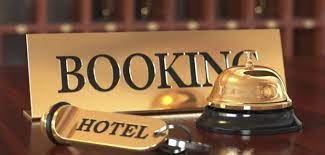

Let's Start
<hr>

# Packages Import

In [ ]:
!pip install pycountry

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
import pycountry as pc

pd.options.display.max_columns = None

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=f3d30e0d38b280b85c6b6b051826050cfaed33e336f03f0023a7e79b1ad0f4c5
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
## Importing Data From Google Drive
from google.colab import drive
drive.mount('/content/drive')
working_directory = '/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv'
hotel_data = pd.read_csv(working_directory)
hotel_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

Mounted at /content/drive


In [ ]:
## Checking the first 5 rows of Data
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<hr>

In [ ]:
# Check the shape Numbers of rows and coumns in CSV File
print(f' There are {hotel_data.shape[0]} number of rows and {hotel_data.shape[1]} number of columns.')

 There are 119390 number of rows and 32 number of columns.


In [ ]:
#looking at the count, min, max values,mean values etc.
hotel_data.describe() 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#Checking for the data types non null entries
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Pre-Processing

In [ ]:
## First we Copy the dataset
copy_df = hotel_data.copy()

### `1. Dealing with Missing Values`

In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
copy_df.isnull().sum().sort_values(ascending=False)[:10] 

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [ ]:
## In the above cell we see there are mainly 4 columns have containg null values so we target them and fill it.

## Drop Rows where there is no adult, baby and child
copy_df = copy_df.drop(copy_df[(copy_df.adults+copy_df.babies+copy_df.children)==0].index)


## If no id of agent or company is null, just replace it with 0
copy_df[['agent','company']] = copy_df[['agent','company']].fillna(0.0)


## For the missing values in the country column, replace it with mode (value that appears most often).
copy_df['country'].fillna(hotel_data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
copy_df['children'].fillna(round(hotel_data.children.mean()), inplace=True)   

### `2. Converting Datatype`

In [ ]:
## convert datatype of these columns from float to integer
copy_df[['children', 'company', 'agent']] = copy_df[['children', 'company', 'agent']].astype('int64') 

<hr>

## Exploratory Data Analysis

In [ ]:
## Main Part Start EDA
## For Easily Ploting Graph we Create a function so we use it directly by just calling the function and Enter value inside it.
## For Ploting Graph we use seaborn and pyplot.
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(8,5), type='bar'):
    '''
    INPUT Work :
        x-:        Array containing values for x-axis
        y-:        Array containing values for y-axis
        x_lable-:  String value for x-axis label
        y_lable-:  String value for y-axis label
        title-:    String value for plot title
        figsize-:  tuple value, for figure size
        type-:     type of plot (default is bar plot) 
    OUTPUT-:
        Display the plot
    '''
    sns.set_style('darkgrid') ## We call seaborn as sns for set background style in DarkGrid
    
    fig, ax = plt.subplots(figsize=figsize)   
    colors = sns.color_palette('pastel')[0:5]
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
    elif type == 'pie' :
        plt.pie(y, labels= x ,colors=colors , shadow = True ,autopct='%.0f%%')
  
    plt.show()

In [ ]:
## Another Function for Count the Values (Capturing the values) from the dataset.
def get_count(column, limit=None):
    
    '''
    INPUT Work:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        column = column.value_counts()[:limit]
    else:
        column = column.value_counts()
    
    x = column.index
    y = column/column.sum()*100
    return x.values,y.values
  


### Let's try to answer our questions

### `1. How Many Booking Were Cancelled`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


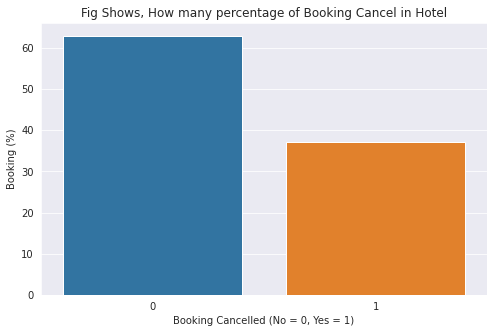

In [ ]:
x,y = get_count(copy_df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)', type = 'bar', title = 'Fig Shows, How many percentage of Booking Cancel in Hotel') 

#### `For further analysis, We Select only those booking which did not get cancelled.`

In [ ]:
df_not_canceled = copy_df[copy_df['is_canceled'] == 0]
df_not_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### `2. What is the booking ratio between Resort Hotel and City Hotel?`

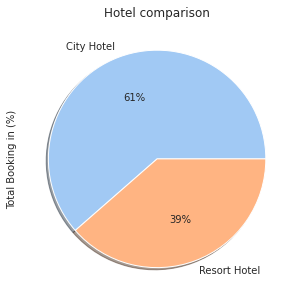

In [ ]:
x,y = get_count(df_not_canceled['hotel']) 
plot(x,y, x_label='', y_label='Total Booking in (%)', title='Hotel comparison', type = 'pie')  

### `3. What is the percentage of booking for each year?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


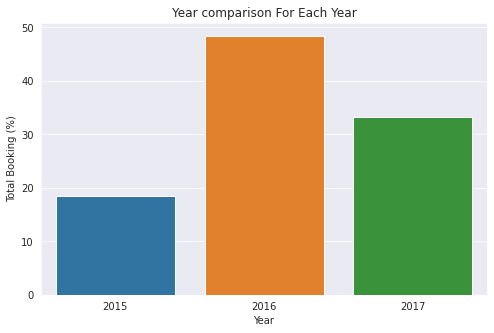

In [ ]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison For Each Year', type = 'bar')

#### `Let's separte it by hotel`

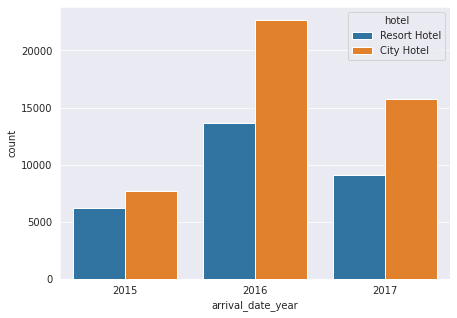

In [ ]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

### `4. Which is the most busy month for hotel?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


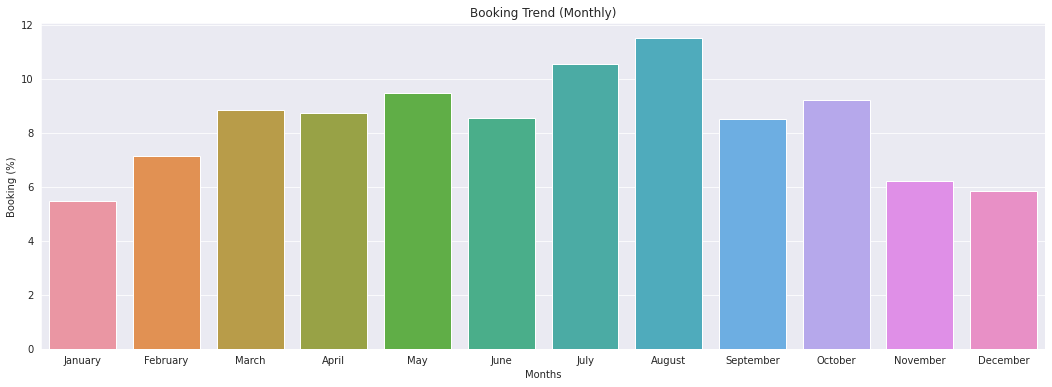

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='bar', figsize=(18,6))

#### Compare Busy Month for Hotel Between Resort vs City 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


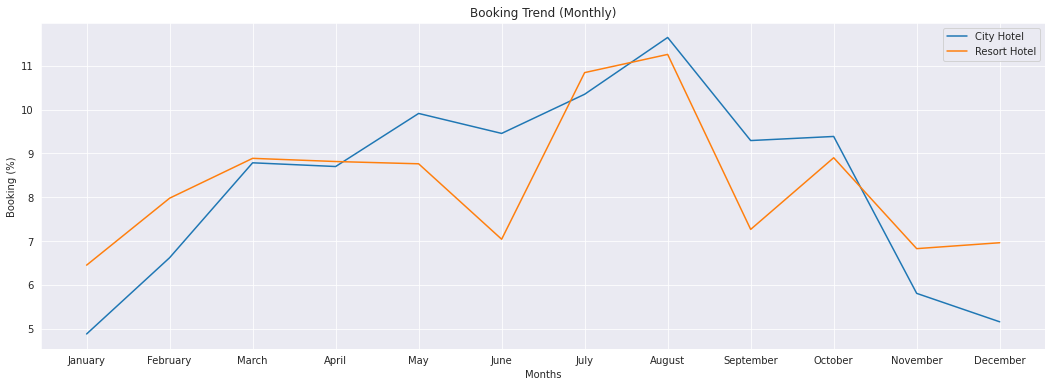

In [ ]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[copy_df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[copy_df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100


## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel')
sns.lineplot(x1, y2.values, label='Resort Hotel')

plt.show()

### `5. From which country most guest come? `

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


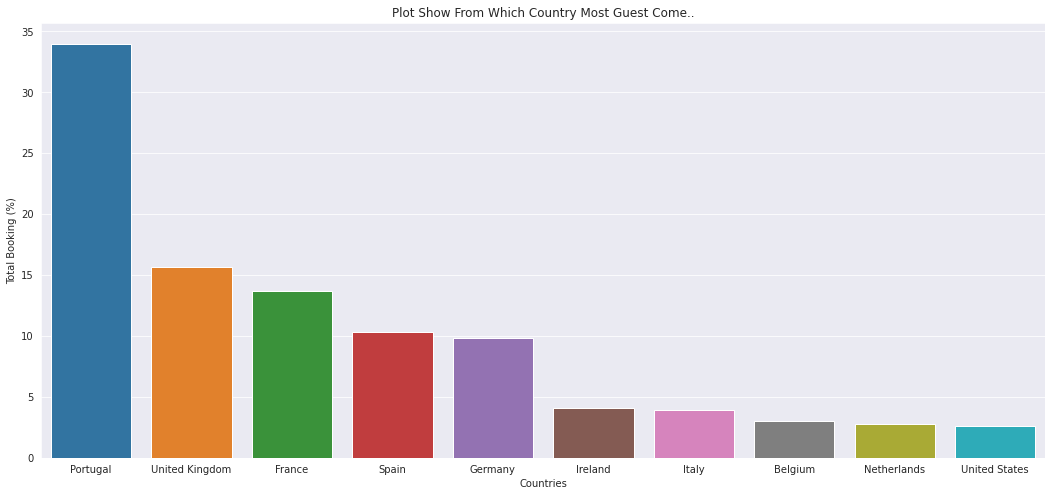

In [ ]:
# Importing Pycountry To Decode Country Code Because in dataset we got country code so we need to convert it into the country name :
import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='Plot Show From Which Country Most Guest Come..', figsize=(18,8))

### `6. How Long People Stay in the hotel?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


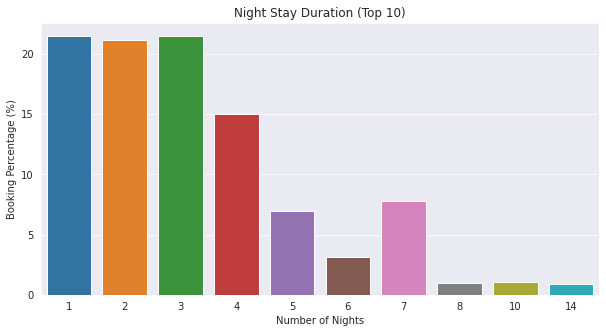

In [ ]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

#### Compare Hotel wise night stay duration resort vs city 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


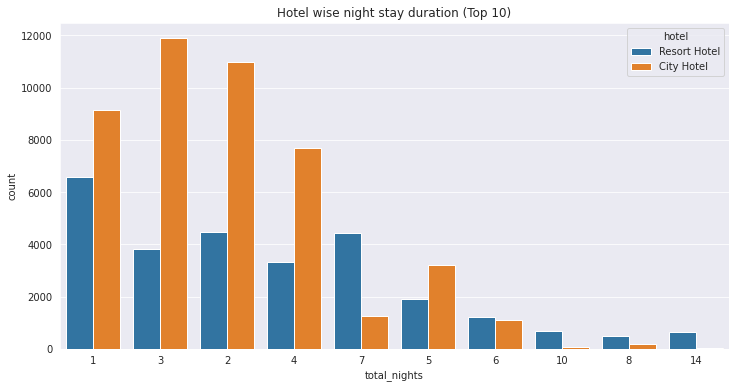

In [ ]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled, order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

### `7.Which is the most booked type of accommodation (Single, Couple, Family)?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


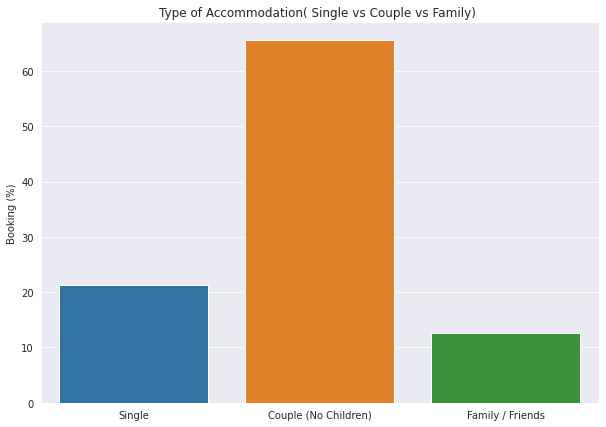

In [ ]:
## Select single, couple, multiple adults and family
single_type   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple_type   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family_type   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies >= 3]


## Make the list of Category names, and their total percentage
type_of_name = ['Single', 'Couple (No Children)', 'Family / Friends']
total_count = [single_type.shape[0],couple_type.shape[0], family_type.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in total_count]


## Draw the curve
plot(type_of_name,count_percent,  y_label='Booking (%)', title='Type of Accommodation( Single vs Couple vs Family) ', figsize=(10,7))

### `8. How many guests repeated in hotel ?`

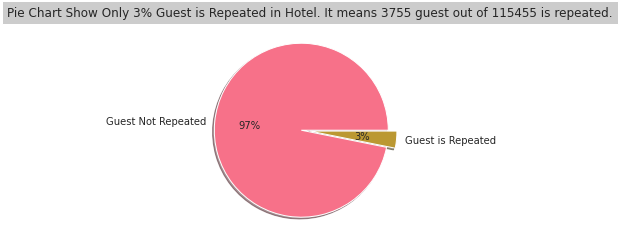

In [ ]:
# we find out how many guest is repeated in hotel and visualize it in pie chart.
x,y = get_count(copy_df['is_repeated_guest'])
x1 = copy_df['is_repeated_guest'].value_counts()
colors = sns.color_palette('husl')[0:2]
explode = (0.1 , 0 ) 
label = ['Guest Not Repeated', 'Guest is Repeated']
plt.pie( y, labels = label , colors = colors, explode=explode, shadow=True,  autopct='%.0f%%')
plt.title(f"Pie Chart Show Only {int(y[1])}% Guest is Repeated in Hotel. It means {x1[1]} guest out of {x1[0]} is repeated.", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

### `9. Types of Customers ?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


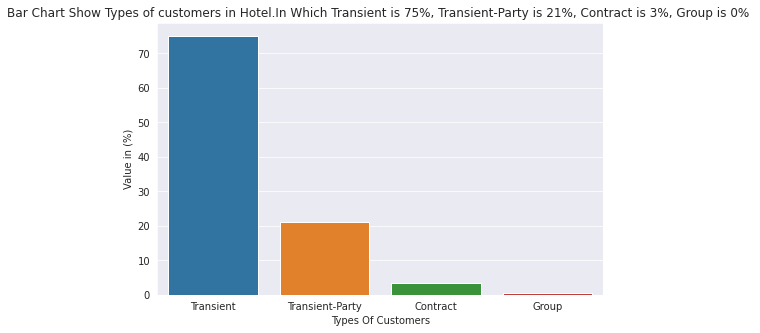

In [ ]:
# we find out Types of Customers i.e Transient vs Contract in hotel and visualize it in pie chart.
x,y = get_count(copy_df['customer_type'])
plot(x,y, x_label='Types Of Customers', y_label='Value in (%)', title = f'Bar Chart Show Types of customers in Hotel.In Which {x[0]} is {int(y[0])}%, {x[1]} is {int(y[1])}%, {x[2]} is {int(y[2])}%, {x[3]} is {int(y[3])}% ' )

### `10. Meal Plan of Customers ?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


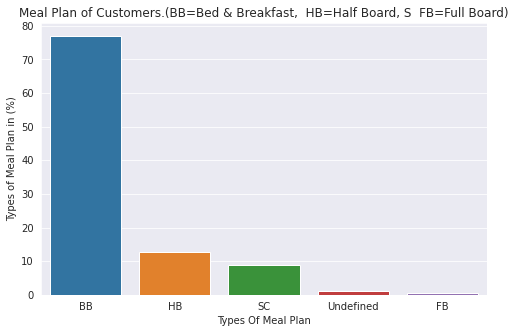

In [ ]:
x,y = get_count(df_not_canceled['meal'])
plot(x,y, x_label='Types Of Meal Plan', y_label='Types of Meal Plan in (%)',title='Meal Plan of Customers.(BB=Bed & Breakfast,  HB=Half Board, S  FB=Full Board)') 

### `11. Which agent makes highest no. of bookings ?`

Text(0.5, 1.0, 'Highest Bookings Made by the agent')

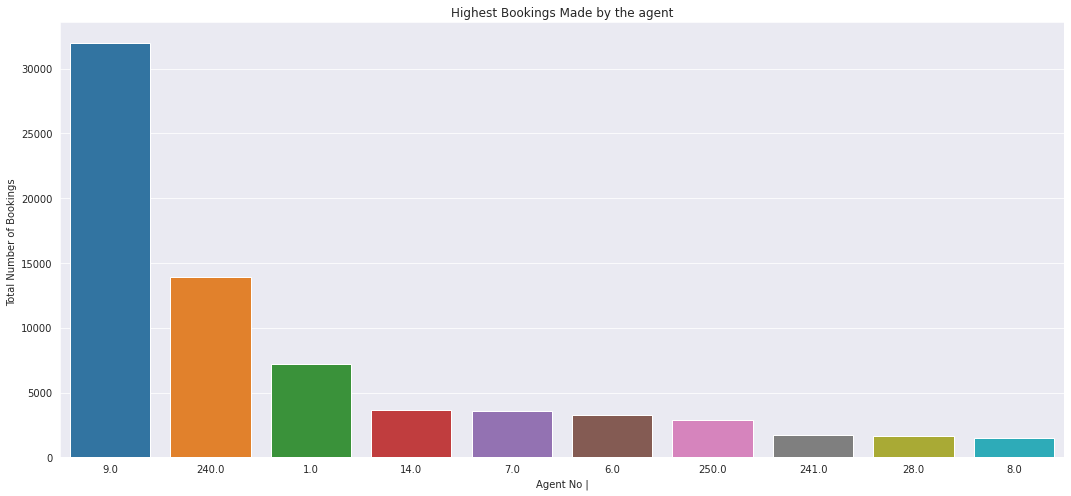

In [ ]:
# Return highest bookings made by agents
top_bookings= hotel_data.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)
top_bookings.drop(top_bookings[top_bookings['agent']==0].index,inplace=True) 

# capture top 10 bookings made by agent
top_highest_bookings_by_agents=top_bookings[:10]
plt.figure(figsize=(18,8))
sns.barplot(x=top_highest_bookings_by_agents['agent'],y=top_highest_bookings_by_agents['Most_Bookings'],order=top_highest_bookings_by_agents['agent'])
plt.xlabel('Agent No |')
plt.ylabel('Total Number of Bookings ')
plt.title("Highest Bookings Made by the agent")

### `12. Which is the most preferred room type by the customers ?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


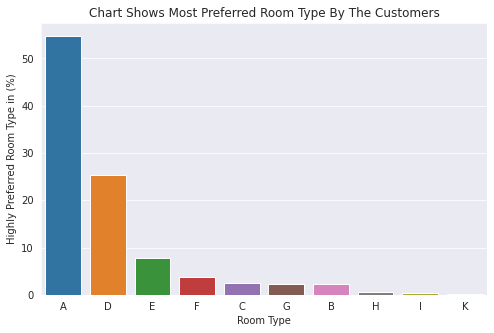

In [ ]:
x,y = get_count(df_not_canceled['assigned_room_type']) 
plot(x,y, x_label='Room Type', y_label='Highly Preferred Room Type in (%)', title='Chart Shows Most Preferred Room Type By The Customers', type = 'bar')  

### `13. Which Hotel type has the highest ADR ?`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


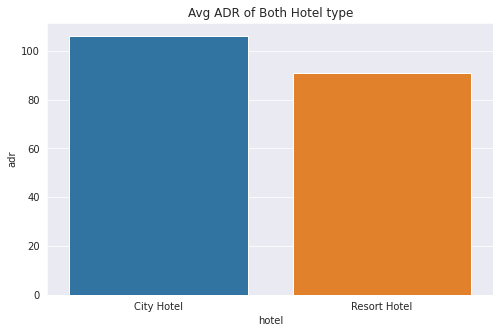

In [ ]:
hotel_by_group=df_not_canceled.groupby('hotel')
#Group By Both Hotel Adr
highest_adr=hotel_by_group['adr'].mean().reset_index()
x=highest_adr['hotel']
y=highest_adr['adr']
plot(x,y, x_label='Hotel Type', y_label='ADR', title='Avg ADR of Both Hotel type', type = 'bar')  

<hr>